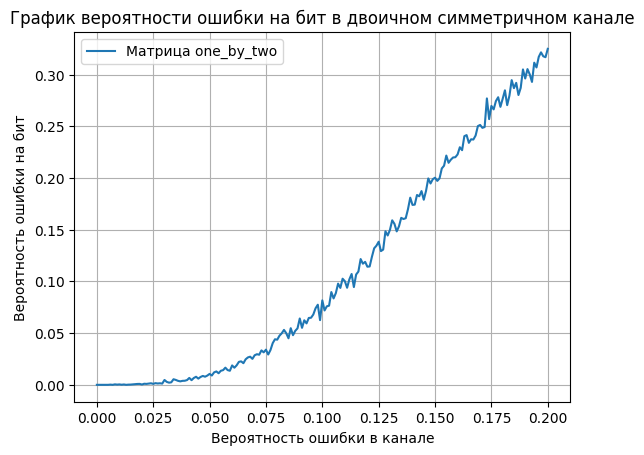

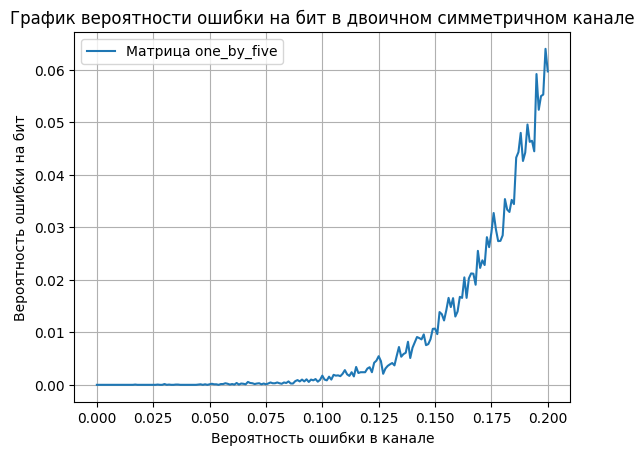

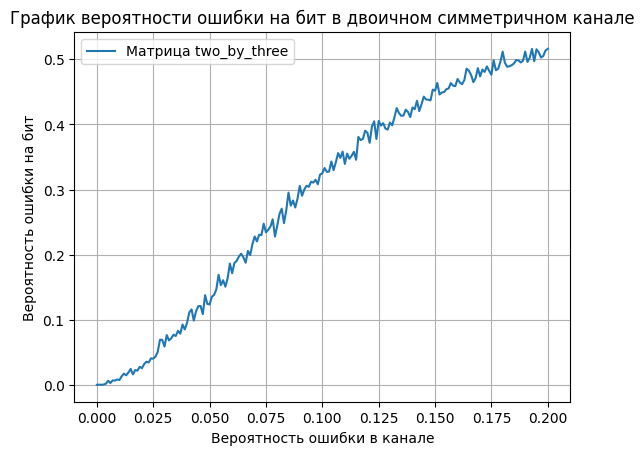

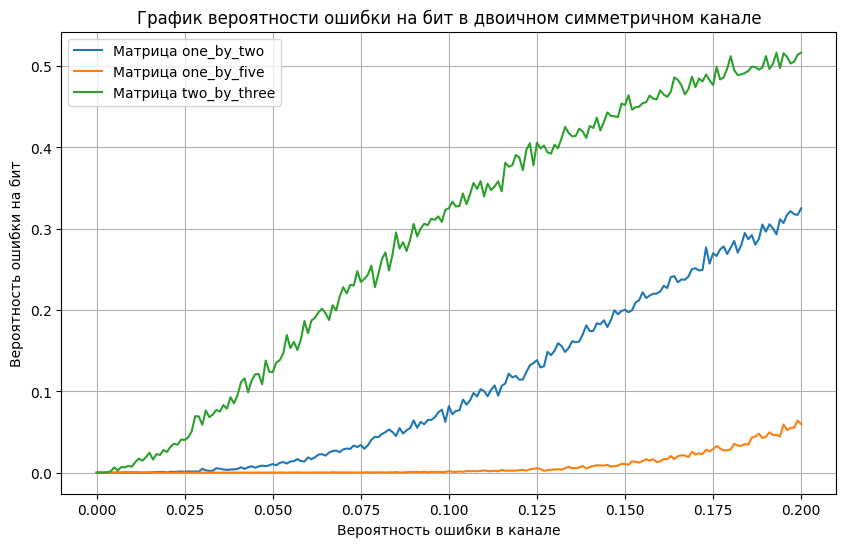

In [9]:
import os
import matplotlib.pyplot as plt

main_folder = "../data"
all_data = {}

def read_data_file(file_path):
    with open(file_path, 'r') as f:
        lines = [line.strip() for line in f if line.strip()]
    if not lines:
        return []
    N = int(lines[0])
    data = [float(line) for line in lines[1:N+1]]
    return data

for folder in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder)
    if not os.path.isdir(folder_path):
        continue

    berr_path = os.path.join(folder_path, "berr.txt")
    duration_path = os.path.join(folder_path, "duration.txt")

    try:
        y = read_data_file(berr_path)
        x = read_data_file(duration_path)
        
        if not x or not y or len(x) != len(y):
            print(f"Error: Different sizes in {folder}")
            continue

        all_data[folder] = (x, y)

        plt.figure()
        plt.plot(x, y, label= 'Матрица ' + folder)
        plt.xlabel("Вероятность ошибки в канале")
        plt.ylabel("Вероятность ошибки на бит")
        plt.title("График вероятности ошибки на бит в двоичном симметричном канале")
        plt.grid(True)
        plt.legend()
        plt.show()
        plt.close()

    except FileNotFoundError:
        print(f"Error: {folder} doesn't exists")

if all_data:
    plt.figure(figsize=(10, 6))
    for folder, (x, y) in all_data.items():
        plt.plot(x, y, label='Матрица ' + folder)
    
    plt.xlabel("Вероятность ошибки в канале")
    plt.ylabel("Вероятность ошибки на бит")
    plt.title("График вероятности ошибки на бит в двоичном симметричном канале")
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.close()
